## Tabular Data:

1. Tabular data is structured in a table format, with rows representing observations and columns representing variables or features.
2. It can include numerical, categorical, or text data.

Examples include customer information, product details, survey responses, etc.

Data preparation, exploratory data analysis (EDA), and visualization are crucial steps in working with tabular datasets.

Data preparation involves cleaning and transforming the raw data to ensure its quality and consistency. This includes handling missing values, removing duplicates, standardizing formats, and transforming variables as needed.

EDA is the process of using statistical and exploratory techniques to understand the patterns, relationships, and anomalies within the tabular data. It involves examining summary statistics, checking distributions, correlations, and identifying underlying patterns.

Visualization plays a vital role in presenting insights from the tabular data in a clear and compelling manner. It involves creating various charts, plots, and graphs to showcase key findings, distributions, and relationships between variables.

## Phase 1: Dataset Setup & Initial Exploration

Step 1: Download the Dataset from Kaggle

Set up Kaggle API:

Ensure you have a Kaggle account and API access. Download your kaggle.json file from your Kaggle account under "Account" > "API" > "Create New API Token".
Upload kaggle.json to Colab to authenticate.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Download the Zillow Home Value Prediction dataset:



In [2]:
!kaggle datasets download -d zillow/zecon
# Unzip the dataset
!unzip zecon.zip


Dataset URL: https://www.kaggle.com/datasets/zillow/zecon
License(s): copyright-authors
 98% 498M/511M [00:06<00:00, 87.3MB/s]
100% 511M/511M [00:06<00:00, 77.7MB/s]
Archive:  zecon.zip
  inflating: City_time_series.csv    
  inflating: CountyCrossWalk_Zillow.csv  
  inflating: County_time_series.csv  
  inflating: DataDictionary.csv      
  inflating: Metro_time_series.csv   
  inflating: Neighborhood_time_series.csv  
  inflating: State_time_series.csv   
  inflating: Zip_time_series.csv     
  inflating: all_available_metrics.json  
  inflating: cities_crosswalk.csv    
  inflating: fields_per_level.json   


Step 2: Load the Dataset into a DataFrame

Import necessary libraries (pandas, numpy, etc.) and load the dataset into a DataFrame:


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('State_time_series.csv')
data.head()


,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


Step 3: Initial Exploration

Check Basic Statistics:

Examine the shape, data types, and basic statistics of the dataset:


In [4]:
print(data.shape)
print(data.info())
print(data.describe())


(13212, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           13212 non-null  object 
 1   RegionName                                                     13212 non-null  object 
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64
 4   InventoryRaw_AllHomes                                          4896 non-null   float64
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64
 7   MedianListingPricePerSqft_3Bedroom            

Identify Missing Values:

Identify columns with missing values and get an initial sense of how prevalent they are:

In [5]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


DaysOnZillow_AllHomes                   8367
InventorySeasonallyAdjusted_AllHomes    8316
InventoryRaw_AllHomes                   8316
MedianListingPricePerSqft_1Bedroom      9626
MedianListingPricePerSqft_2Bedroom      8678
                                        ... 
ZRI_AllHomes                            8958
ZRI_AllHomesPlusMultifamily             8876
ZriPerSqft_AllHomes                     8876
Zri_MultiFamilyResidenceRental          8876
Zri_SingleFamilyResidenceRental         8958
Length: 80, dtype: int64


Step 4: Auto EDA & Visualization

Generate Auto EDA Report (using Sweetviz or Pandas Profiling):

Install Sweetviz or Pandas Profiling if not already installed:

In [6]:
!pip install sweetviz  # For Sweetviz
# !pip install pandas-profiling  # For Pandas Profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.9 MB/s eta 0:00:00


Create and display the EDA report:


In [7]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html('Zillow_EDA_Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Zillow_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Manual EDA Insights:

1. Generate visualizations manually for key insights:
2. Distribution of target variables (e.g., home values).
3. Trends over time (e.g., average home values by year or month).
4. Correlation heatmap to visualize relationships between numeric features.

Step 1: Visualize Target Variable Distribution


Distribution of Home Values:

This helps in understanding if the target variable (home value) is skewed or has outliers.

In [9]:
print(data.columns)

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

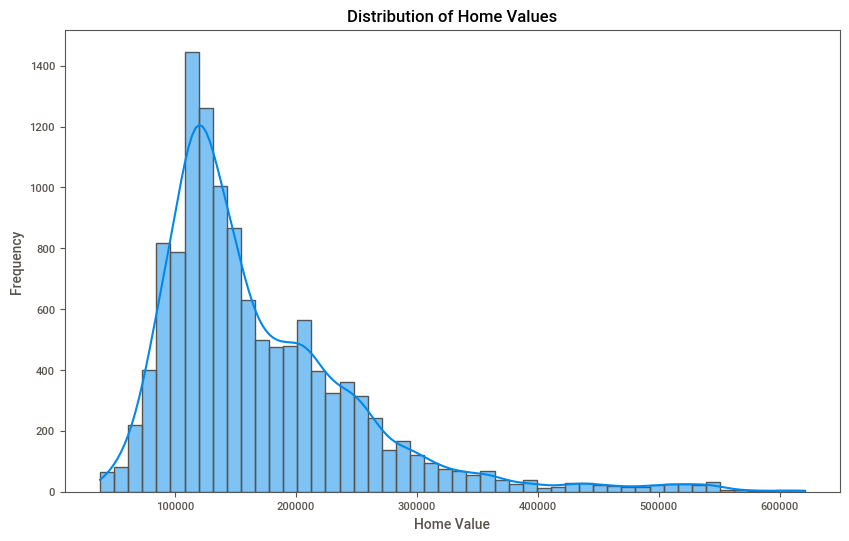

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['ZHVI_AllHomes'], bins=50, kde=True)
plt.title('Distribution of Home Values')
plt.xlabel('Home Value')
plt.ylabel('Frequency')
plt.show()


Step 2: Analyze Trends Over Time

Trend of Home Values Over Time:

For time-series data, it’s useful to see how average home values have changed over months or years. We’ll plot the monthly average to capture trends.

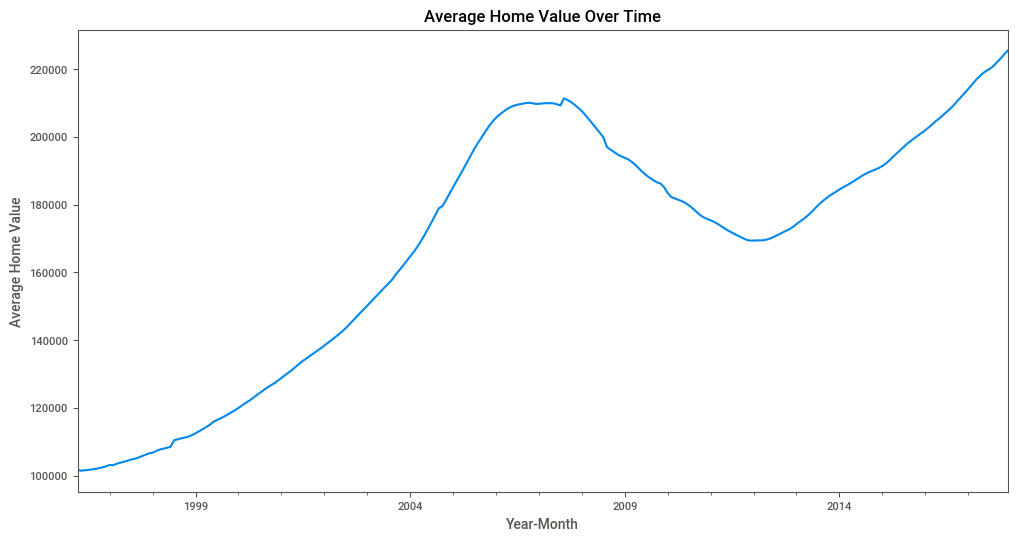

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
monthly_avg = data.groupby(data['Date'].dt.to_period("M"))['ZHVI_AllHomes'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title('Average Home Value Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Home Value')
plt.show()


Step 3: Explore Categorical Variables (Location-based)

Average Home Value by Location:

To understand regional variations, plot average home values across different locations (e.g., by state or city).

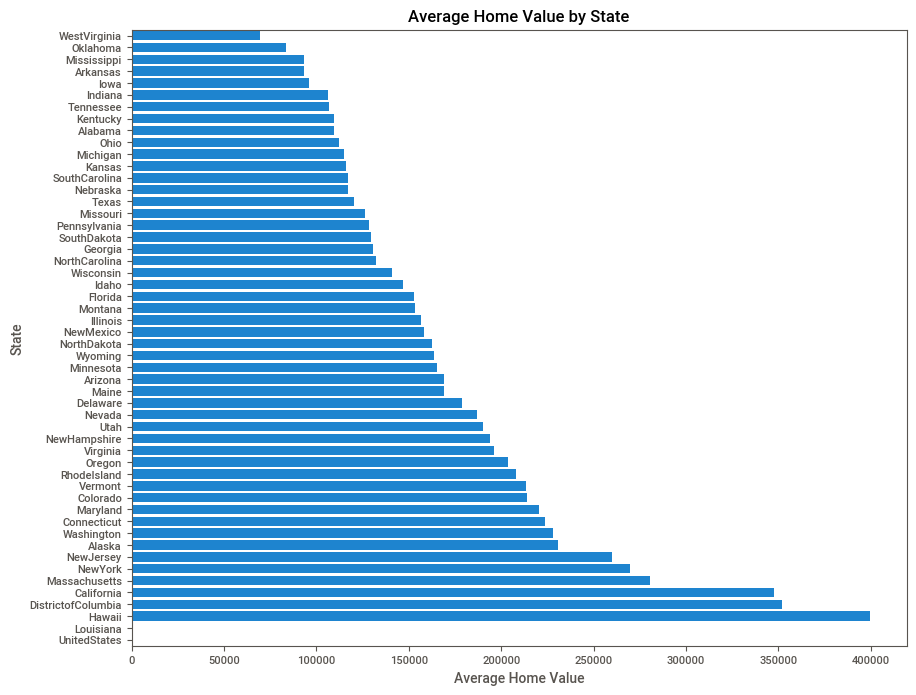

In [14]:
location_avg = data.groupby('RegionName')['ZHVI_AllHomes'].mean().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(y=location_avg.index, x=location_avg.values)
plt.title('Average Home Value by State')
plt.xlabel('Average Home Value')
plt.ylabel('State')
plt.show()


Step 4: Correlation Analysis

Correlation Heatmap:

This will show how the numeric features relate to each other and highlight strong correlations.

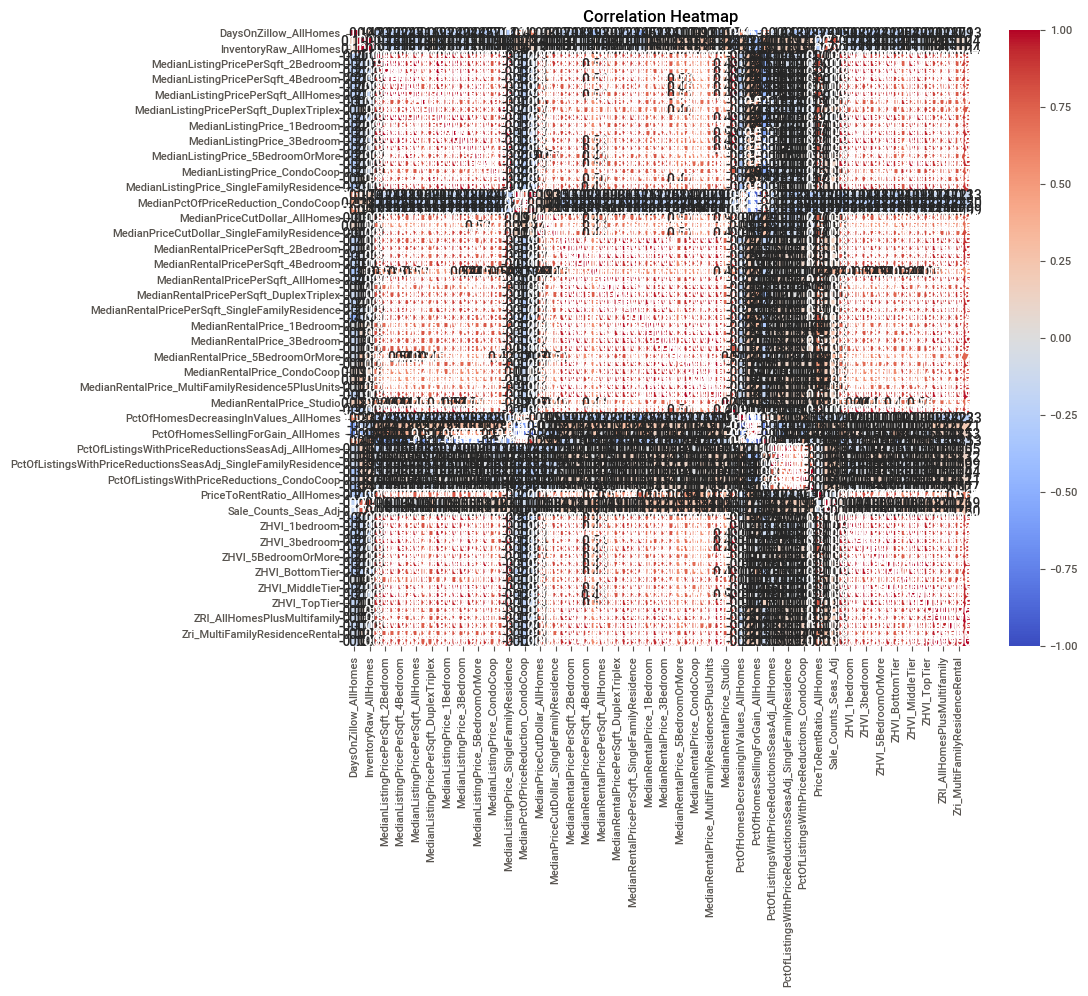

In [16]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Phase 2: Data Preprocessing & Feature Engineering

Step 1: Data Cleaning & Preprocessing

Handle Missing Values:

Check for missing values again and decide on an imputation strategy for each column based on the data type.

In [18]:
print(data.columns)

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [19]:
# Display columns with missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Example imputation strategies (adjust based on your data exploration):
data['Sale_Prices'] = data['Sale_Prices'].fillna(data['Sale_Prices'].mean())  # for numeric columns
data['RegionName'] = data['RegionName'].fillna(data['RegionName'].mode()[0])  # for categorical columns


DaysOnZillow_AllHomes                   8367
InventorySeasonallyAdjusted_AllHomes    8316
InventoryRaw_AllHomes                   8316
MedianListingPricePerSqft_1Bedroom      9626
MedianListingPricePerSqft_2Bedroom      8678
                                        ... 
ZRI_AllHomes                            8958
ZRI_AllHomesPlusMultifamily             8876
ZriPerSqft_AllHomes                     8876
Zri_MultiFamilyResidenceRental          8876
Zri_SingleFamilyResidenceRental         8958
Length: 80, dtype: int64


Remove Outliers:

We can use statistical methods (e.g., Z-score or IQR) to identify and handle outliers, particularly in home value columns.

In [20]:
# Using Z-score for outlier removal
from scipy import stats

z_scores = np.abs(stats.zscore(data['ZHVI_AllHomes']))
data = data[z_scores < 3]  # Remove rows where Z-score is greater than 3


Convert Categorical Variables:

Convert non-numeric categorical columns (like State) into a numerical format. We can use one-hot encoding or label encoding depending on the feature.

In [23]:
# Example: One-hot encoding for 'State' column
data = pd.get_dummies(data, columns=['RegionName'], drop_first=True)


Normalize or Scale Numeric Data:

Scaling helps improve the performance of clustering and other algorithms sensitive to feature magnitudes.

In [33]:
print(data.columns)


Index(['Date', 'DaysOnZillow_AllHomes', 'InventorySeasonallyAdjusted_AllHomes',
       'InventoryRaw_AllHomes', 'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'MedianPctOfPriceReduction_S

In [39]:
data = pd.read_csv('State_time_series.csv')  # Reload the dataset
print(data.shape)


(13212, 82)


In [40]:
# Check for missing values before proceeding
print(data.isnull().sum())

# Fill missing values or selectively drop rows
data['ZHVI_AllHomes'].fillna(data['ZHVI_AllHomes'].mean(), inplace=True)
data['MedianListingPricePerSqft_AllHomes'].fillna(data['MedianListingPricePerSqft_AllHomes'].mean(), inplace=True)


Date                                       0
RegionName                                 0
DaysOnZillow_AllHomes                   8367
InventorySeasonallyAdjusted_AllHomes    8316
InventoryRaw_AllHomes                   8316
                                        ... 
ZRI_AllHomes                            8958
ZRI_AllHomesPlusMultifamily             8876
ZriPerSqft_AllHomes                     8876
Zri_MultiFamilyResidenceRental          8876
Zri_SingleFamilyResidenceRental         8958
Length: 82, dtype: int64


<ipython-input-40-dcb3ac31f0c5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ZHVI_AllHomes'].fillna(data['ZHVI_AllHomes'].mean(), inplace=True)
<ipython-input-40-dcb3ac31f0c5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['ZHVI_AllHomes', 'MedianListingPricePerSqft_AllHomes']] = scaler.fit_transform(data[['ZHVI_AllHomes', 'MedianListingPricePerSqft_AllHomes']])


Step 2: Clustering & Anomaly Detection
Perform Clustering:

Use K-Means clustering to group similar data points. You can adjust the number of clusters based on elbow method results.

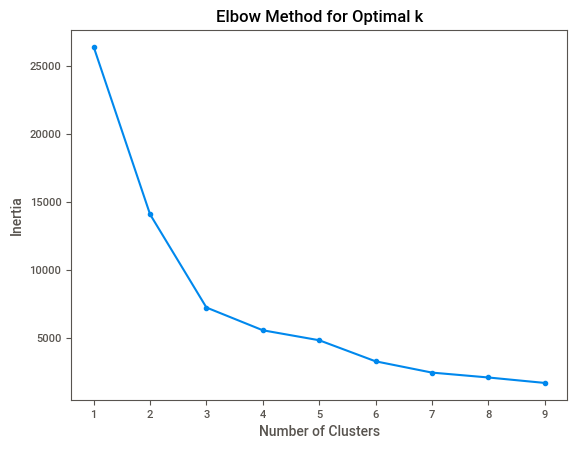

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['ZHVI_AllHomes', 'MedianListingPricePerSqft_AllHomes']])  # Adjust with relevant columns
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


After deciding on the number of clusters, assign cluster labels to each data point.


In [44]:
optimal_k = 3  # Example value, adjust based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['ZHVI_AllHomes', 'MedianListingPricePerSqft_AllHomes']])


Detect Anomalies Using Clustering:

Identify anomalies by flagging points that are distant from their cluster centroids or belong to small clusters.

Step 3: Feature Engineering & Selection
Feature Engineering:

Create new features based on insights from EDA. For instance:

1. Temporal Features: Extract month, year, or season from the date column.

2. Location-Based Features: Calculate average property values per state, if applicable.

In [46]:
import pandas as pd

# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Now you can extract temporal features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

Feature Selection:

Use correlation analysis and feature selection techniques to retain the most relevant features.
Apply methods like Recursive Feature Elimination (RFE) if your dataset has a large number of features.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Step 1: Load your dataset
# Make sure to load the dataset as done previously
data = pd.read_csv('State_time_series.csv')  # Replace with your actual dataset path

# Step 2: Drop unnecessary columns and separate features and target
# Drop the target variable and any non-numeric columns (e.g., 'Date')
X = data.drop(columns=['ZHVI_AllHomes', 'Date'])  # Adjust target variable if necessary
y = data['ZHVI_AllHomes']

# Step 3: One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Step 4: Handle missing values in X
# Impute missing values in the feature matrix
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Convert imputed data back to a DataFrame
X = pd.DataFrame(X_imputed, columns=X.columns)

# Step 5: Handle missing values in y (Choose one of the following methods)

# Option A: Drop rows with NaN in y
non_null_indices = y.dropna().index
X = X.loc[non_null_indices]
y = y.dropna()

# OR Option B: Impute missing values in y (Uncomment if using this instead)
# y.fillna(y.mean(), inplace=True)

# Step 6: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Perform RFE with LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)
selected_features = X.columns[rfe.support_]

# Display selected features
print("Selected Features:", selected_features)


Selected Features: Index(['MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'PctOfHomesSellingForGain_AllHomes',
       'PctOfHomesSellingForLoss_AllHomes', 'ZHVI_MiddleTier'],
      dtype='object')


## Phase 3: Model Building with AutoML.

Step 1: Install and Import AutoViML

If you haven't installed AutoViML in your Colab environment, you can do so with the following command:

In [58]:
!pip install autoviml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

Step 2: Prepare Data for AutoViML

AutoViML expects the data to be in a single DataFrame with features and target combined. We will reassemble X and y into a single DataFrame.

In [22]:
import pandas as pd

# Combine features and target into one DataFrame
data_for_autoviml = pd.concat([X, y], axis=1)
data_for_autoviml.columns = list(X.columns) + ['target']  # Rename target column to 'target'


Step 3: Import AutoViML and Set Up Model Training


In [25]:
print(data_for_autoviml.head())  # Check if the DataFrame is loaded correctly
print("Target column:", 'target' in data_for_autoviml.columns)  # Verify target column exists


   RegionName  DaysOnZillow_AllHomes  InventorySeasonallyAdjusted_AllHomes  \
0     Alabama                    NaN                                   NaN   
1     Arizona                    NaN                                   NaN   
2    Arkansas                    NaN                                   NaN   
3  California                    NaN                                   NaN   
4    Colorado                    NaN                                   NaN   

   InventoryRaw_AllHomes  MedianListingPricePerSqft_1Bedroom  \
0                    NaN                                 NaN   
1                    NaN                                 NaN   
2                    NaN                                 NaN   
3                    NaN                                 NaN   
4                    NaN                                 NaN   

   MedianListingPricePerSqft_2Bedroom  MedianListingPricePerSqft_3Bedroom  \
0                                 NaN                                

In [27]:
!pip install -U scikit-learn


Step 4: Train the Model

You can now train the model using AutoViML. This will perform feature selection, model training, and hyperparameter tuning automatically.

In [36]:
!pip install -U tpot

In [5]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load your dataset
data = pd.read_csv('State_time_series.csv')  # Adjust to your file path
X = data.drop(columns=['ZHVI_AllHomes', 'Date'])
y = data['ZHVI_AllHomes'].fillna(data['ZHVI_AllHomes'].mean())

# Convert categorical data to numeric
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom configuration dictionary without KNeighborsRegressor
custom_config = {
    'sklearn.linear_model.LinearRegression': {},
    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'sklearn.tree.DecisionTreeRegressor': {
        'max_depth': [None, 3, 5, 7, 10]
    },
    'sklearn.ensemble.AdaBoostRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

# Initialize TPOT with the custom configuration
tpot = TPOTRegressor(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    max_time_mins=5,
    config_dict=custom_config
)

# Fit the TPOT model
tpot.fit(X_train, y_train)

# Evaluate the model
y_pred = tpot.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Export the best pipeline
tpot.export('best_model_pipeline.py')


Imputing missing values in feature set


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


8.88 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingRegressor(input_matrix, learning_rate=0.2, max_depth=7, n_estimators=100)
Imputing missing values in feature set
Mean Squared Error: 58311.48323082292
R-squared Score: 0.9999918729805936


Step 5: Evaluate the Model

AutoViML automatically provides evaluation metrics. However, you can also manually evaluate the trained model on a validation set if you have one. Here’s a quick setup for evaluating model performance.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = tpot.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Imputing missing values in feature set
Mean Squared Error: 58311.48323082292
R-squared Score: 0.9999918729805936
